# Exploration and Comparison of Transformers for Image Classification

Comparison of results for **every experiment** across 6 datasets for each model
- ViT
- DeiT
- Swin
- CLIP

Showing the results in a different file is to avoid information and visual clutter.

NOTE: Since variables are not saved accros multiple jupyter notebook files, the data needs to be taken from the individual notebooks and hardcoded here.

### Prerequisites

Load necessary packages.

In [38]:
import os
os.chdir('..')
from utils.data_utils import *
from utils.visualization_utils import *
import pandas as pd
import numpy as np

In [3]:
dataset_names = ['RESISC45', 'Food-101', 'FER2013', 'PatchCamelyon', 'SUN397', 'DTD']
models = ['ViT', 'DeiT', 'Swin', 'CLIP']

### Results

Get the results from each model.

NOTE: Taken from "Results" section from each notebook.

#### Zero-shot transfer

In [83]:
experiments = ['No prompt', 'Basic prompt', 'OpenAI prompt']

In [84]:
resisc45_zst = [0.543810, 0.565556, 0.616984]
food101_zst = [0.866772, 0.865584, 0.887168]
fer2013_zst = [0.408470, 0.454444, 0.435776]
pcam_zst = [0.558594, 0.553680, 0.540894]	
sun397_zst = [0.600000, 0.622207, 0.596092]
dtd_zst = [0.447340, 0.409574, 0.429787]

In [85]:
results_zst = [
    resisc45_zst,
    food101_zst,
    fer2013_zst,
    pcam_zst,
    sun397_zst,
    dtd_zst,
]

In [87]:
acc_dict_zst = create_accuracy_dict(
    results_zst,
    dataset_names
)

In [89]:
df = pd.DataFrame(results_zst, columns=experiments, index=dataset_names)
df['Basic prompt (% Δ)'] = ((df['Basic prompt'] - df['No prompt']) * 100).round(2)
df['OpenAI prompt (% Δ)'] = ((df['OpenAI prompt'] - df['No prompt']) * 100).round(2)
df

,No prompt,Basic prompt,OpenAI prompt,Basic prompt (% Δ),OpenAI prompt (% Δ)
RESISC45,0.543810,0.565556,0.616984,2.17,7.32
Food-101,0.866772,0.865584,0.887168,-0.12,2.04
FER2013,0.408470,0.454444,0.435776,4.60,2.73
PatchCamelyon,0.558594,0.553680,0.540894,-0.49,-1.77
SUN397,0.600000,0.622207,0.596092,2.22,-0.39
DTD,0.447340,0.409574,0.429787,-3.78,-1.76


#### Few-Shot Linear Probing

In [4]:
resisc45_vit_fslp = [0.281587, 0.386667, 0.531905, 0.616190, 0.691746]
food101_vit_fslp = [0.405149, 0.536436, 0.654970, 0.717149, 0.756554]
fer2013_vit_fslp = [0.308721, 0.309557, 0.311507, 0.309557, 0.419615]
pcam_vit_fslp = [0.302277, 0.372742, 0.468689, 0.720123, 0.717987]
sun397_vit_fslp = [0.427800, 0.534300, 0.612500, 0.659816, 0.657885]
dtd_vit_fslp = [0.270213, 0.361170, 0.456915, 0.521809, 0.594681]

resisc45_deit_fslp = [0.304762, 0.458095, 0.594127, 0.689206, 0.754762]
food101_deit_fslp = [0.198495, 0.301386, 0.425941, 0.520871, 0.597901]
fer2013_deit_fslp = [0.173865, 0.152689, 0.186960, 0.160490, 0.316801]
pcam_deit_fslp = [0.493317, 0.520508, 0.540375, 0.718689, 0.719208]
sun397_deit_fslp = [0.255264, 0.377425, 0.470023, 0.541471, 0.568368]
dtd_deit_fslp = [0.261170, 0.365426, 0.465957, 0.556915, 0.613830]

resisc45_swin_fslp = [0.339683, 0.481746, 0.632063, 0.711111, 0.761270]
food101_swin_fslp = [0.396554, 0.544277, 0.668792, 0.751485, 0.788792]
fer2013_swin_fslp = [0.276400, 0.250209, 0.317359, 0.363054, 0.437169]
pcam_swin_fslp = [0.466797, 0.484222, 0.426880, 0.749481, 0.762115]
sun397_swin_fslp = [0.406805, 0.529655, 0.622989, 0.671356, 0.691494]
dtd_swin_fslp = [0.373404, 0.467553, 0.522340, 0.589362, 0.651596]

resisc45_clip_fslp = [0.476032, 0.585079, 0.731587, 0.786508, 0.821429]
food101_clip_fslp = [0.358733, 0.535208, 0.646535, 0.727960, 0.785267]
fer2013_clip_fslp = [0.226247, 0.200613, 0.262190, 0.321538, 0.405127]
pcam_clip_fslp = [0.514862, 0.553131, 0.638550, 0.656250, 0.696045]
sun397_clip_fslp = [0.350621, 0.479172, 0.555402, 0.616552, 0.655724]
dtd_clip_fslp = [0.379787, 0.475532, 0.569681, 0.626596, 0.667021]

Aggregate results over datasets.

In [5]:
results_resisc45_fslp = [resisc45_vit_fslp, resisc45_deit_fslp, resisc45_swin_fslp, resisc45_clip_fslp]
results_food101_fslp = [food101_vit_fslp, food101_deit_fslp, food101_swin_fslp, food101_clip_fslp]
results_fer2013_fslp = [fer2013_vit_fslp, fer2013_deit_fslp, fer2013_swin_fslp, fer2013_clip_fslp]
results_pcam_fslp = [pcam_vit_fslp, pcam_deit_fslp, pcam_swin_fslp, pcam_clip_fslp]
results_sun397_fslp = [sun397_vit_fslp, sun397_deit_fslp, sun397_swin_fslp, sun397_clip_fslp]
results_dtd_fslp = [dtd_vit_fslp, dtd_deit_fslp, dtd_swin_fslp, dtd_clip_fslp]

Concatenate all results into a single variable.

In [6]:
results_fslp = [
    results_resisc45_fslp,
    results_food101_fslp,
    results_fer2013_fslp,
    results_pcam_fslp,
    results_sun397_fslp,
    results_dtd_fslp,
]

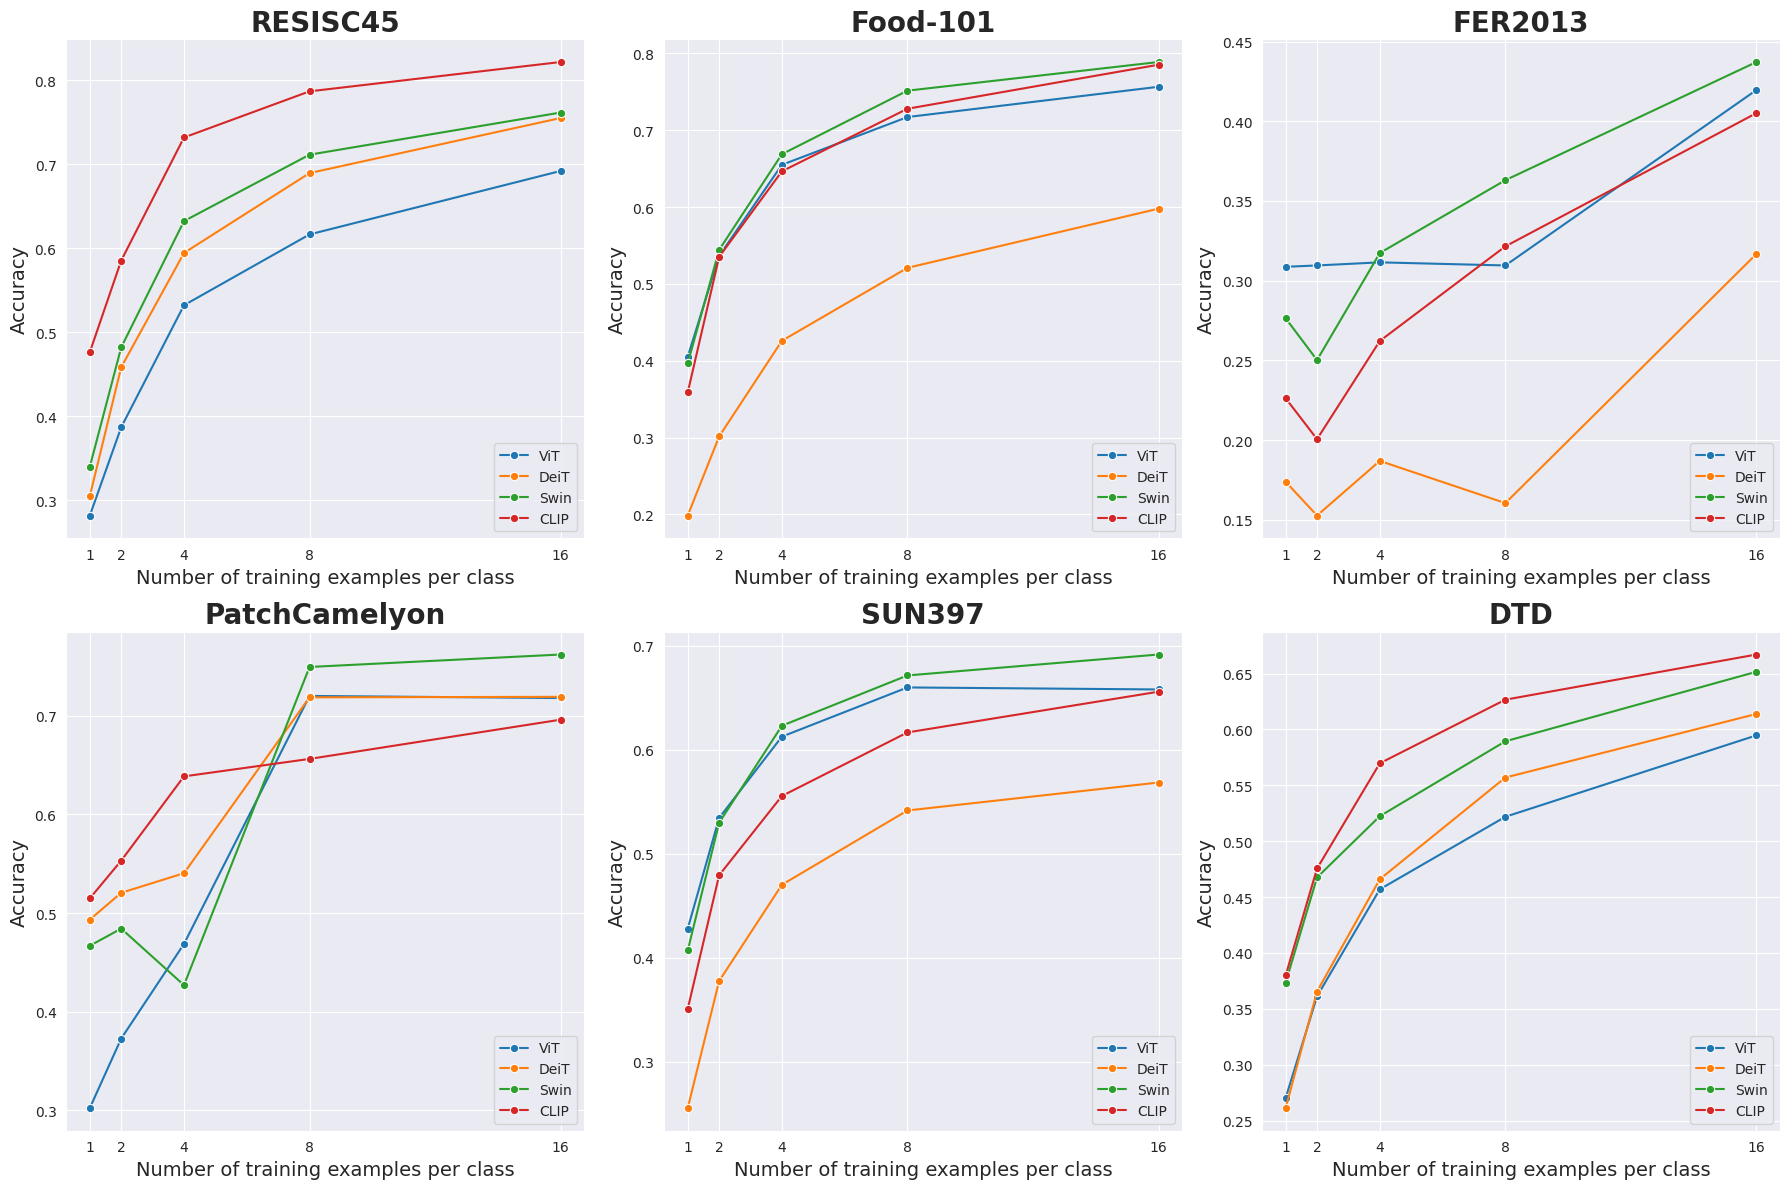

In [8]:
plot_few_shot_results_multiple(
    results_fslp, 
    dataset_names, 
    models,
)

#### Linear probing

In [10]:
resisc45_vit_lp = 0.846349
food101_vit_lp = 0.859644
fer2013_vit_lp = 0.601839
pcam_vit_lp = 0.843079
sun397_vit_lp = 0.774529
dtd_vit_lp = 0.730319

resisc45_deit_lp = 0.886667
food101_deit_lp = 0.786297
fer2013_deit_lp = 0.527445
pcam_deit_lp = 0.832336
sun397_deit_lp = 0.726851
dtd_deit_lp = 0.714894

resisc45_swin_lp = 0.885397
food101_swin_lp = 0.894733
fer2013_swin_lp = 0.612148
pcam_swin_lp = 0.845551
sun397_swin_lp = 0.804184
dtd_swin_lp = 0.782447

resisc45_clip_lp = 0.898730
food101_clip_lp = 0.889149
fer2013_clip_lp = 0.670939
pcam_clip_lp = 0.836365
sun397_clip_lp = 0.790575
dtd_clip_lp = 0.726064

Aggregate results over datasets.

In [11]:
results_resisc45_lp = [resisc45_vit_lp, resisc45_deit_lp, resisc45_swin_lp, resisc45_clip_lp]
results_food101_lp = [food101_vit_lp, food101_deit_lp, food101_swin_lp, food101_clip_lp]
results_fer2013_lp = [fer2013_vit_lp, fer2013_deit_lp, fer2013_swin_lp, fer2013_clip_lp]
results_pcam_lp = [pcam_vit_lp, pcam_deit_lp, pcam_swin_lp, pcam_clip_lp]
results_sun397_lp = [sun397_vit_lp, sun397_deit_lp, sun397_swin_lp, sun397_clip_lp]
results_dtd_lp = [dtd_vit_lp, dtd_deit_lp, dtd_swin_lp, dtd_clip_lp]

Concatenate all results into a single variable.

In [12]:
results_lp = [
    results_resisc45_lp,
    results_food101_lp,
    results_fer2013_lp,
    results_pcam_lp,
    results_sun397_lp,
    results_dtd_lp,
]

In [15]:
acc_dict_lp = create_accuracy_dict(
    results_lp,
    dataset_names
)

In [16]:
acc_dict_lp

{'RESISC45': [0.846349, 0.886667, 0.885397, 0.89873],
 'Food-101': [0.859644, 0.786297, 0.894733, 0.889149],
 'FER2013': [0.601839, 0.527445, 0.612148, 0.670939],
 'PatchCamelyon': [0.843079, 0.832336, 0.845551, 0.836365],
 'SUN397': [0.774529, 0.726851, 0.804184, 0.790575],
 'DTD': [0.730319, 0.714894, 0.782447, 0.726064]}

In [21]:
df = pd.DataFrame(results_lp, columns=[n for n in models], index=dataset_names)
df

,ViT,DeiT,Swin,CLIP
RESISC45,0.846349,0.886667,0.885397,0.898730
Food-101,0.859644,0.786297,0.894733,0.889149
FER2013,0.601839,0.527445,0.612148,0.670939
PatchCamelyon,0.843079,0.832336,0.845551,0.836365
SUN397,0.774529,0.726851,0.804184,0.790575
DTD,0.730319,0.714894,0.782447,0.726064


Print the model that was best for each dataset.

In [19]:
for dataset, values in acc_dict_lp.items():
    max_value = max(values)
    best_model = models[values.index(max_value)]
    print(f"For dataset \033[1m{dataset}\033[0m, the best model using \033[1mlinear probing\033[0m is \033[1m{best_model}\033[0m with an accuracy of \033[1m{max_value:.6}\033[0m")

For dataset RESISC45, the best model using linear probing is CLIP with an accuracy of 0.89873
For dataset Food-101, the best model using linear probing is Swin with an accuracy of 0.894733
For dataset FER2013, the best model using linear probing is CLIP with an accuracy of 0.670939
For dataset PatchCamelyon, the best model using linear probing is Swin with an accuracy of 0.845551
For dataset SUN397, the best model using linear probing is Swin with an accuracy of 0.804184
For dataset DTD, the best model using linear probing is Swin with an accuracy of 0.782447


#### Fine-tuning

In [22]:
resisc45_vit_ft = 0.946032
food101_vit_ft = 0.877861
fer2013_vit_ft = 0.697687
pcam_vit_ft = 0.888702
sun397_vit_ft = 0.763540
dtd_vit_ft = 0.788830

resisc45_deit_ft = 0.931429
food101_deit_ft = 0.857505
fer2013_deit_ft = 0.698245
pcam_deit_ft = 0.838531
sun397_deit_ft = 0.721149
dtd_deit_ft = 0.771277

resisc45_swin_ft = 0.958095
food101_swin_ft = 0.895842
fer2013_swin_ft = 0.703817
pcam_swin_ft = 0.850311
sun397_swin_ft = 0.778621
dtd_swin_ft = 0.821809

resisc45_clip_ft = 0.879524
food101_clip_ft = 0.794693
fer2013_clip_ft = 0.686542
pcam_clip_ft = 0.833099
sun397_clip_ft = 0.661333
dtd_clip_ft = 0.657447

Aggregate results over datasets.

In [23]:
results_resisc45_ft = [resisc45_vit_ft, resisc45_deit_ft, resisc45_swin_ft, resisc45_clip_ft]
results_food101_ft = [food101_vit_ft, food101_deit_ft, food101_swin_ft, food101_clip_ft]
results_fer2013_ft = [fer2013_vit_ft, fer2013_deit_ft, fer2013_swin_ft, fer2013_clip_ft]
results_pcam_ft = [pcam_vit_ft, pcam_deit_ft, pcam_swin_ft, pcam_clip_ft]
results_sun397_ft = [sun397_vit_ft, sun397_deit_ft, sun397_swin_ft, sun397_clip_ft]
results_dtd_ft = [dtd_vit_ft, dtd_deit_ft, dtd_swin_ft, dtd_clip_ft]

Concatenate all results into a single variable.

In [24]:
results_ft = [
    results_resisc45_ft,
    results_food101_ft,
    results_fer2013_ft,
    results_pcam_ft,
    results_sun397_ft,
    results_dtd_ft,
]

In [25]:
acc_dict_ft = create_accuracy_dict(
    results_ft,
    dataset_names
)

In [26]:
acc_dict_ft

{'RESISC45': [0.946032, 0.931429, 0.958095, 0.879524],
 'Food-101': [0.877861, 0.857505, 0.895842, 0.794693],
 'FER2013': [0.697687, 0.698245, 0.703817, 0.686542],
 'PatchCamelyon': [0.888702, 0.838531, 0.850311, 0.833099],
 'SUN397': [0.76354, 0.721149, 0.778621, 0.661333],
 'DTD': [0.78883, 0.771277, 0.821809, 0.657447]}

Display a dataframe containing the results for model and dataset.

In [27]:
df = pd.DataFrame(results_ft, columns=[n for n in models], index=dataset_names)
df

,ViT,DeiT,Swin,CLIP
RESISC45,0.946032,0.931429,0.958095,0.879524
Food-101,0.877861,0.857505,0.895842,0.794693
FER2013,0.697687,0.698245,0.703817,0.686542
PatchCamelyon,0.888702,0.838531,0.850311,0.833099
SUN397,0.763540,0.721149,0.778621,0.661333
DTD,0.788830,0.771277,0.821809,0.657447


Print the model that was best for each dataset.

In [28]:
for dataset, values in acc_dict_ft.items():
    max_value = max(values)
    best_model = models[values.index(max_value)]
    print(f"For dataset \033[1m{dataset}\033[0m, the best model using \033[1mfine-tuning\033[0m is \033[1m{best_model}\033[0m with an accuracy of \033[1m{max_value:.6}\033[0m")

For dataset RESISC45, the best model using fine-tuning is Swin with an accuracy of 0.958095
For dataset Food-101, the best model using fine-tuning is Swin with an accuracy of 0.895842
For dataset FER2013, the best model using fine-tuning is Swin with an accuracy of 0.703817
For dataset PatchCamelyon, the best model using fine-tuning is ViT with an accuracy of 0.888702
For dataset SUN397, the best model using fine-tuning is Swin with an accuracy of 0.778621
For dataset DTD, the best model using fine-tuning is Swin with an accuracy of 0.821809


#### Fine-tuning with data augmentations

In [29]:
resisc45_vit_ftda = 0.950635
food101_vit_ftda = 0.872317
fer2013_vit_ftda = 0.709111
pcam_vit_ftda = 0.871582
sun397_vit_ftda = 0.770805
dtd_vit_ftda = 0.786702

resisc45_deit_ftda = 0.955397
food101_deit_ftda = 0.845109
fer2013_deit_ftda = 0.686821
pcam_deit_ftda = 0.881317
sun397_deit_ftda = 0.732966
dtd_deit_ftda = 0.772340

resisc45_swin_ftda = 0.948889
food101_swin_ftda = 0.901703
fer2013_swin_ftda = 0.715798
pcam_swin_ftda = 0.898834
sun397_swin_ftda = 0.789425
dtd_swin_ftda = 0.807447

resisc45_clip_ftda = 0.947778
food101_clip_ftda = 0.815089
fer2013_clip_ftda = 0.677069
pcam_clip_ftda = 0.840698
sun397_clip_ftda = 0.685517
dtd_clip_ftda = 0.703191

Aggregate results over datasets.

In [30]:
results_resisc45_ftda = [resisc45_vit_ftda, resisc45_deit_ftda, resisc45_swin_ftda, resisc45_clip_ftda]
results_food101_ftda = [food101_vit_ftda, food101_deit_ftda, food101_swin_ftda, food101_clip_ftda]
results_fer2013_ftda = [fer2013_vit_ftda, fer2013_deit_ftda, fer2013_swin_ftda, fer2013_clip_ftda]
results_pcam_ftda = [pcam_vit_ftda, pcam_deit_ftda, pcam_swin_ftda, pcam_clip_ftda]
results_sun397_ftda = [sun397_vit_ftda, sun397_deit_ftda, sun397_swin_ftda, sun397_clip_ftda]
results_dtd_ftda = [dtd_vit_ftda, dtd_deit_ftda, dtd_swin_ftda, dtd_clip_ftda]

Concatenate all results into a single variable.

In [31]:
results_ftda = [
    results_resisc45_ftda,
    results_food101_ftda,
    results_fer2013_ftda,
    results_pcam_ftda,
    results_sun397_ftda,
    results_dtd_ftda,
]

In [32]:
acc_dict_ftda = create_accuracy_dict(
    results_ftda,
    dataset_names
)

In [33]:
acc_dict_ftda

{'RESISC45': [0.950635, 0.955397, 0.948889, 0.947778],
 'Food-101': [0.872317, 0.845109, 0.901703, 0.815089],
 'FER2013': [0.709111, 0.686821, 0.715798, 0.677069],
 'PatchCamelyon': [0.871582, 0.881317, 0.898834, 0.840698],
 'SUN397': [0.770805, 0.732966, 0.789425, 0.685517],
 'DTD': [0.786702, 0.77234, 0.807447, 0.703191]}

Display a dataframe containing the results for model and dataset.

In [34]:
df = pd.DataFrame(results_ftda, columns=[n for n in models], index=dataset_names)
df

,ViT,DeiT,Swin,CLIP
RESISC45,0.950635,0.955397,0.948889,0.947778
Food-101,0.872317,0.845109,0.901703,0.815089
FER2013,0.709111,0.686821,0.715798,0.677069
PatchCamelyon,0.871582,0.881317,0.898834,0.840698
SUN397,0.770805,0.732966,0.789425,0.685517
DTD,0.786702,0.772340,0.807447,0.703191


Print the model that was best for each dataset.

In [35]:
for dataset, values in acc_dict_ftda.items():
    max_value = max(values)
    best_model = models[values.index(max_value)]
    print(f"For dataset \033[1m{dataset}\033[0m, the best model using \033[1mfine-tuning with data augmentations\033[0m is \033[1m{best_model}\033[0m with an accuracy of \033[1m{max_value:.6}\033[0m")

For dataset RESISC45, the best model using fine-tuning with data augmentations is DeiT with an accuracy of 0.955397
For dataset Food-101, the best model using fine-tuning with data augmentations is Swin with an accuracy of 0.901703
For dataset FER2013, the best model using fine-tuning with data augmentations is Swin with an accuracy of 0.715798
For dataset PatchCamelyon, the best model using fine-tuning with data augmentations is Swin with an accuracy of 0.898834
For dataset SUN397, the best model using fine-tuning with data augmentations is Swin with an accuracy of 0.789425
For dataset DTD, the best model using fine-tuning with data augmentations is Swin with an accuracy of 0.807447


#### Linear probing vs. Fine-tuning vs. Fine-tuning with data augmentations

In [70]:
results_lp_np = np.array(results_lp)
results_lp_ft_np = np.array(results_ft)
results_ftda_np = np.array(results_ftda)
results_agg = np.hstack((results_lp_np, results_lp_ft, results_ftda))

In [90]:
df = pd.DataFrame(results_agg[:, [0, 4, 8]], columns=['ViT (linear probing)', 'ViT (fine-tuning)', 'ViT (fine-tuning with data augmentations)'], index=dataset_names)
df['fine-tuning (% Δ)'] = ((df['ViT (fine-tuning)'] - df['ViT (linear probing)']) * 100).round(2)
df['(fine-tuning with data augmentations (% Δ)'] = ((df['ViT (fine-tuning with data augmentations)'] - df['ViT (linear probing)']) * 100).round(2)
df

,ViT (linear probing),ViT (fine-tuning),ViT (fine-tuning with data augmentations),fine-tuning (% Δ),(fine-tuning with data augmentations (% Δ)
RESISC45,0.846349,0.946032,0.950635,9.97,10.43
Food-101,0.859644,0.877861,0.872317,1.82,1.27
FER2013,0.601839,0.697687,0.709111,9.58,10.73
PatchCamelyon,0.843079,0.888702,0.871582,4.56,2.85
SUN397,0.774529,0.763540,0.770805,-1.10,-0.37
DTD,0.730319,0.788830,0.786702,5.85,5.64


In [100]:
print(f"ViT fine-tuning results are on average {df['fine-tuning (% Δ)'].mean().round(2)} % better than linear probing.")
print(f"ViT fine-tuning with data augmentations results are on average {df['(fine-tuning with data augmentations (% Δ)'].mean().round(2)} % better than linear probing.")

ViT fine-tuning results are on average 5.11 % better than linear probing.
ViT fine-tuning with data augmentations results are on average 5.09 % better than linear probing.


In [101]:
df = pd.DataFrame(results_agg[:, [1, 5, 9]], columns=['DeiT (linear probing)', 'DeiT (fine-tuning)', 'DeiT (fine-tuning with data augmentations)'], index=dataset_names)
df['fine-tuning (% Δ)'] = ((df['DeiT (fine-tuning)'] - df['DeiT (linear probing)']) * 100).round(2)
df['(fine-tuning with data augmentations (% Δ)'] = ((df['DeiT (fine-tuning with data augmentations)'] - df['DeiT (linear probing)']) * 100).round(2)
df

,DeiT (linear probing),DeiT (fine-tuning),DeiT (fine-tuning with data augmentations),fine-tuning (% Δ),(fine-tuning with data augmentations (% Δ)
RESISC45,0.886667,0.931429,0.955397,4.48,6.87
Food-101,0.786297,0.857505,0.845109,7.12,5.88
FER2013,0.527445,0.698245,0.686821,17.08,15.94
PatchCamelyon,0.832336,0.838531,0.881317,0.62,4.90
SUN397,0.726851,0.721149,0.732966,-0.57,0.61
DTD,0.714894,0.771277,0.772340,5.64,5.74


In [102]:
print(f"DeiT fine-tuning results are on average {df['fine-tuning (% Δ)'].mean().round(2)} % better than linear probing.")
print(f"DeiT fine-tuning with data augmentations results are on average {df['(fine-tuning with data augmentations (% Δ)'].mean().round(2)} % better than linear probing.")

DeiT fine-tuning results are on average 5.73 % better than linear probing.
DeiT fine-tuning with data augmentations results are on average 6.66 % better than linear probing.


In [103]:
df = pd.DataFrame(results_agg[:, [2, 6, 10]], columns=['Swin (linear probing)', 'Swin (fine-tuning)', 'Swin (fine-tuning with data augmentations)'], index=dataset_names)
df['fine-tuning (% Δ)'] = ((df['Swin (fine-tuning)'] - df['Swin (linear probing)']) * 100).round(2)
df['(fine-tuning with data augmentations (% Δ)'] = ((df['Swin (fine-tuning with data augmentations)'] - df['Swin (linear probing)']) * 100).round(2)
df

,Swin (linear probing),Swin (fine-tuning),Swin (fine-tuning with data augmentations),fine-tuning (% Δ),(fine-tuning with data augmentations (% Δ)
RESISC45,0.885397,0.958095,0.948889,7.27,6.35
Food-101,0.894733,0.895842,0.901703,0.11,0.70
FER2013,0.612148,0.703817,0.715798,9.17,10.37
PatchCamelyon,0.845551,0.850311,0.898834,0.48,5.33
SUN397,0.804184,0.778621,0.789425,-2.56,-1.48
DTD,0.782447,0.821809,0.807447,3.94,2.50


In [104]:
print(f"Swin fine-tuning results are on average {df['fine-tuning (% Δ)'].mean().round(2)} % better than linear probing.")
print(f"Swin fine-tuning with data augmentations results are on average {df['(fine-tuning with data augmentations (% Δ)'].mean().round(2)} % better than linear probing.")

Swin fine-tuning results are on average 3.07 % better than linear probing.
Swin fine-tuning with data augmentations results are on average 3.96 % better than linear probing.


In [105]:
df = pd.DataFrame(results_agg[:, [3, 7, 11]], columns=['CLIP (linear probing)', 'CLIP (fine-tuning)', 'CLIP (fine-tuning with data augmentations)'], index=dataset_names)
df['fine-tuning (% Δ)'] = ((df['CLIP (fine-tuning)'] - df['CLIP (linear probing)']) * 100).round(2)
df['(fine-tuning with data augmentations (% Δ)'] = ((df['CLIP (fine-tuning with data augmentations)'] - df['CLIP (linear probing)']) * 100).round(2)
df

,CLIP (linear probing),CLIP (fine-tuning),CLIP (fine-tuning with data augmentations),fine-tuning (% Δ),(fine-tuning with data augmentations (% Δ)
RESISC45,0.898730,0.879524,0.947778,-1.92,4.90
Food-101,0.889149,0.794693,0.815089,-9.45,-7.41
FER2013,0.670939,0.686542,0.677069,1.56,0.61
PatchCamelyon,0.836365,0.833099,0.840698,-0.33,0.43
SUN397,0.790575,0.661333,0.685517,-12.92,-10.51
DTD,0.726064,0.657447,0.703191,-6.86,-2.29


In [107]:
print(f"CLIP fine-tuning results are on average {df['fine-tuning (% Δ)'].mean().round(2)} % worse than linear probing.")
print(f"CLIP fine-tuning with data augmentations results are on average {df['(fine-tuning with data augmentations (% Δ)'].mean().round(2)} % worse than linear probing.")

CLIP fine-tuning results are on average -4.99 % worse than linear probing.
CLIP fine-tuning with data augmentations results are on average -2.38 % worse than linear probing.
